In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('/content/drive/MyDrive/weather-automated-sensors-dataset.csv')


In [5]:
print("Dataset Shape:", data.shape)


Dataset Shape: (59144, 18)


In [6]:
print("Dataset Columns:", data.columns)


Dataset Columns: Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')


In [7]:
print("\nDataset Sample:")
print(data.head())


Dataset Sample:
                 Station Name   Measurement Timestamp  Air Temperature  \
0  Oak Street Weather Station  05/22/2015 03:00:00 PM              NaN   
1  Oak Street Weather Station  05/22/2015 05:00:00 PM              NaN   
2  Oak Street Weather Station  05/22/2015 06:00:00 PM              NaN   
3  Oak Street Weather Station  05/22/2015 07:00:00 PM              NaN   
4  Oak Street Weather Station  05/22/2015 08:00:00 PM              NaN   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                   7.0      55.0             0.0            0.0         1.4   
1                   6.3      56.0             0.0            0.0         1.4   
2                   6.5      54.0             0.0            0.0         1.4   
3                   6.3      53.0             0.0            0.0         1.4   
4                   6.4      52.0             0.0            0.0         1.4   

   Precipitation Type  Wind Direction  Wind Speed  Maximu

In [8]:
print(data.describe())

       Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     59066.000000          38843.000000  59141.000000    38843.000000   
mean         13.282062             10.643001     69.464517        0.187591   
std           9.945331              8.965170     15.714691        1.962149   
min         -19.890000            -20.100000     17.000000        0.000000   
25%           5.500000              4.000000     59.000000        0.000000   
50%          14.900000             12.100000     71.000000        0.000000   
75%          21.500000             18.100000     82.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   59141.000000  38843.000000        38843.000000    59141.000000   
mean        0.175327    185.445529            4.651932      178.980132   
std         1.300946    231.579782           16.168542      108.124898   
m

In [9]:
missing_values = data.isnull().sum()


In [10]:
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
Measurement Timestamp              3
Air Temperature                   78
Wet Bulb Temperature           20301
Humidity                           3
Rain Intensity                 20301
Interval Rain                      3
Total Rain                     20301
Precipitation Type             20301
Wind Direction                     3
Wind Speed                         3
Maximum Wind Speed                 3
Barometric Pressure              149
Solar Radiation                    3
Heading                        20301
Battery Life                       3
Measurement Timestamp Label        3
dtype: int64


In [11]:
data = data.dropna()


In [12]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     38768.000000          38768.000000  38768.000000    38768.000000   
mean         13.611832             10.634356     70.968479        0.187737   
std           9.936154              8.969845     15.948284        1.963699   
min         -19.500000            -20.100000     17.000000        0.000000   
25%           5.800000              4.000000     60.000000        0.000000   
50%          15.300000             12.100000     72.000000        0.000000   
75%          21.800000             18.100000     83.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   38768.000000  38768.000000        38768.000000    38768.000000   
mean        0.184861    185.791813            4.654741      171.104132   
std         1.228837    231.669581           16.173181

In [13]:
numeric_data = data.select_dtypes(include=[np.number])


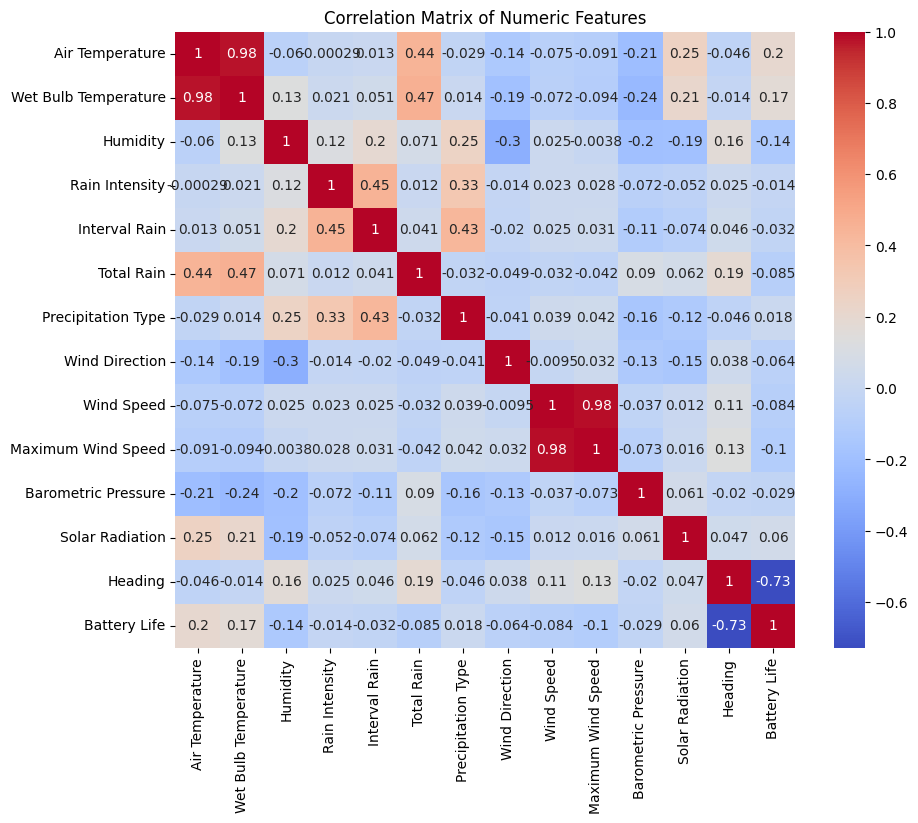

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

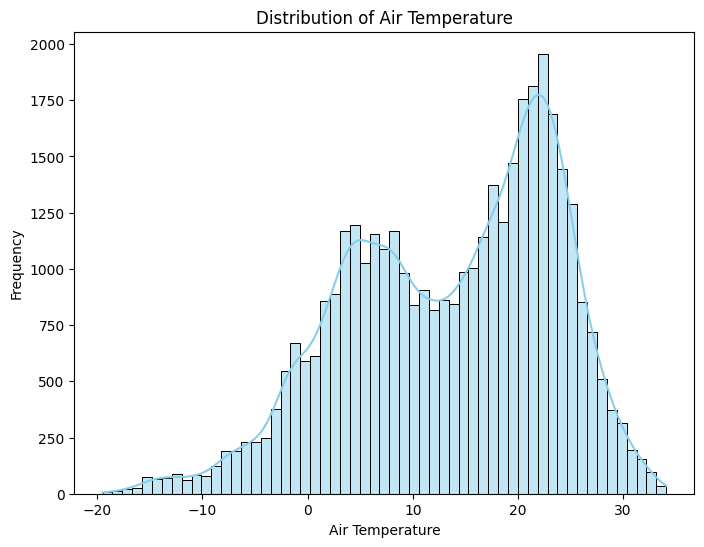

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Air Temperature'], kde=True, color='skyblue')
plt.title("Distribution of Air Temperature")
plt.xlabel("Air Temperature")
plt.ylabel("Frequency")
plt.show()

In [16]:
if 'Station Name' in data.columns:
    data = data.drop(columns=['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID'])

In [17]:
features = data.drop(columns=['Air Temperature'])
target = data['Air Temperature']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [21]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
print("\nRNN Model Summary:")
model.summary()


RNN Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 97.4915 - mean_squared_error: 97.4915 - val_loss: 0.8761 - val_mean_squared_error: 0.8761
Epoch 2/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.6621 - mean_squared_error: 0.6621 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 3/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1529 - mean_squared_error: 0.1529 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 4/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1757 - mean_squared_error: 0.1757 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 5/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 6/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 7/50
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0739 - mean_squared_error: 0.0

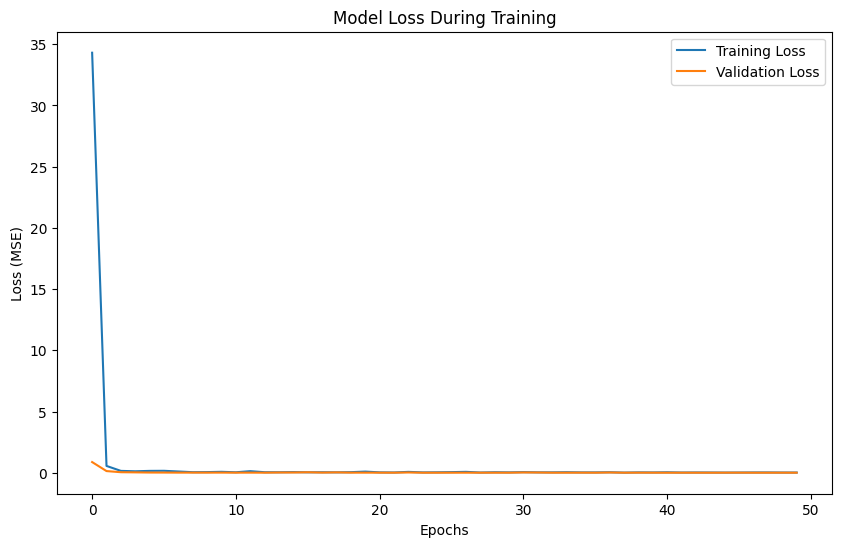

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [24]:
y_pred = model.predict(X_test_reshaped)


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")



Evaluation Metrics:
Mean Squared Error (MSE): 0.0073
R^2 Score: 0.9999
Mean Absolute Percentage Error (MAPE): 292507822675.3413
Root Mean Squared Error (RMSE): 0.0854
Mean Absolute Error (MAE): 0.0613
Explained Variance Score: 0.9999


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


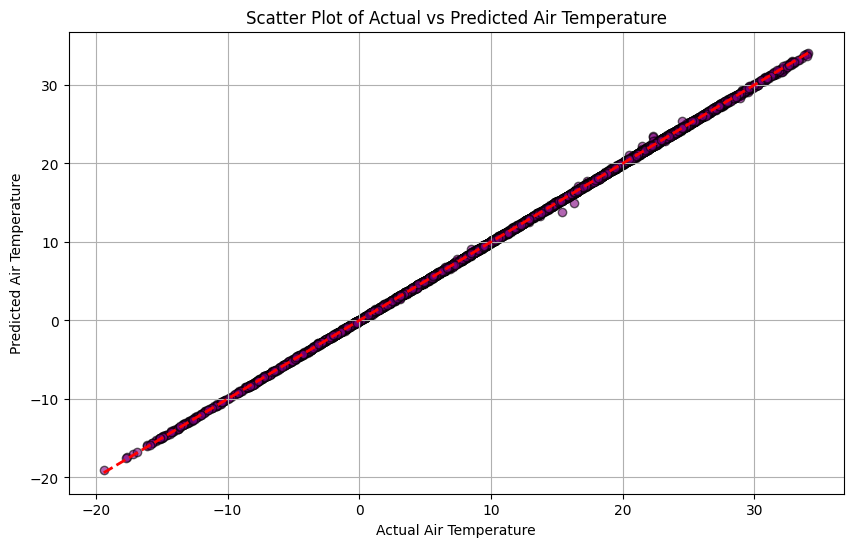

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred, color='purple', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Scatter Plot of Actual vs Predicted Air Temperature")
plt.xlabel("Actual Air Temperature")
plt.ylabel("Predicted Air Temperature")
plt.grid(True)
plt.show()

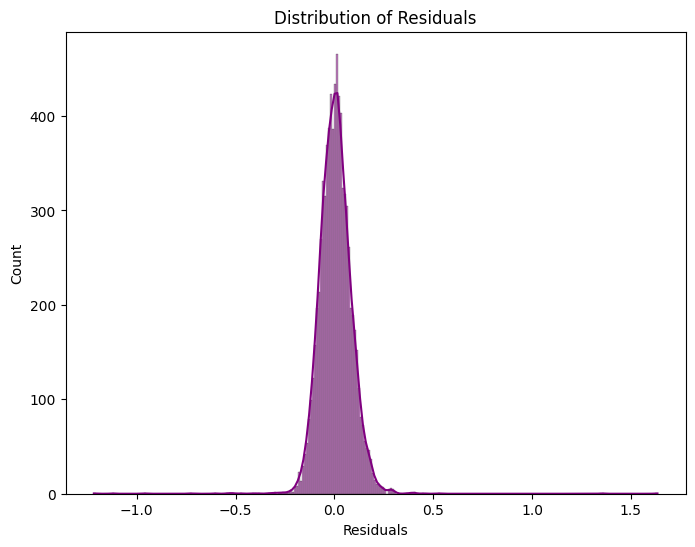

In [29]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()